# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

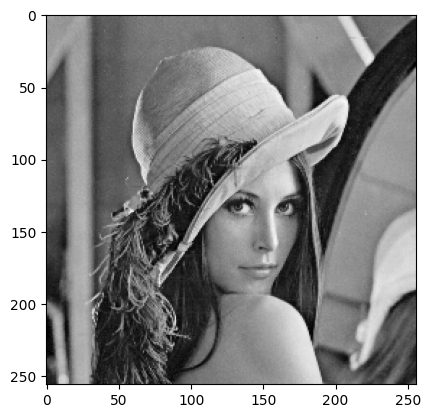

In [5]:
img_l = plt.imread("data/lena.png")
plt.imshow(img_l, "gray")

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [17]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] < n or p[1] < n or p[0] > img.shape[0]-(n+1) or p[1] > img.shape[1]-(n+1): 
                result[p] = 0 #img[p]
        else:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[tuple(numpy.add(tuple(numpy.subtract(p, (n, n))), q))]
            result[p] = (1/(size**2)) * neighborhood_sum
            
    return result

In [56]:
test = numpy.zeros((9, 9))
test[1, 1] = 4
test[2, 1] = 3
test[4, 4] = 9
test[6, 8] = 7

#print(test)
p = (6,8)
#q = (3,3)
#print(test[tuple(numpy.subtract(q,(1,1)))])
#print(test)
#for q in numpy.ndindex(3, 3):
#    print(test[tuple(numpy.subtract(q,(1, 1)))])
#print(test)
#print(test[tuple(numpy.add(tuple(numpy.subtract(p, (5, 5))), q))])
#print((5,-7) < (0,0))
print(test[p[0]])


[0. 0. 0. 0. 0. 0. 0. 0. 7.]


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

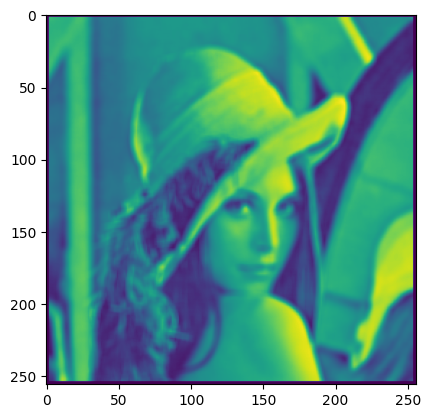

In [27]:
plt.imshow(meanfilter(img_l, 5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [23]:
assert (meanfilter(img_l, 5) == plt.imread("data/lena_meanfilter5.png")).all()

AssertionError: 

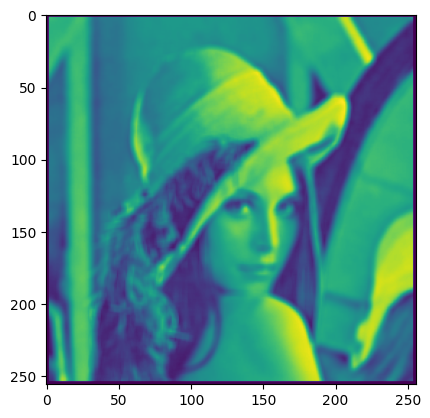

In [24]:
img_AAA = plt.imread("data/lena_meanfilter5.png")
plt.imshow(img_AAA)

In [28]:
assert (numpy.allclose(meanfilter(img_l, 5), plt.imread("data/lena_meanfilter5.png"), atol=1/255))

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [33]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] < n or p[1] < n or p[0] > img.shape[0]-(n+1) or p[1] > img.shape[1]-(n+1): 
                result[p] = 0
        else:
            neighborhood_list = list()
            for q in numpy.ndindex(size, size):
                neighborhood_list.append(img[tuple(numpy.add(tuple(numpy.subtract(p, (n, n))), q))])
            neighborhood_list.sort()
            result[p] = neighborhood_list[int(int((size**2)/2))+1]

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

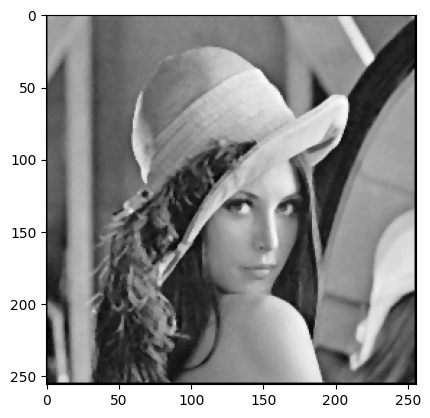

In [36]:
plt.imshow(medianfilter(img_l, 3), "gray")

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: